In [37]:
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
import joblib
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")

df_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    38 non-null     float64
 1   Average_income                38 non-null     int64  
 2   Paved_Highways                38 non-null     int64  
 3   Population_Driver_licence(%)  38 non-null     float64
 4   Petrol_Consumption            38 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.6 KB


In [4]:
df_train.sample(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
2,8.0,5319,11868,0.451,344
27,7.0,3656,3985,0.563,699
8,7.0,4318,10340,0.586,635
1,7.5,4870,2351,0.529,414
21,6.0,5215,2302,0.672,782
35,7.0,4332,8159,0.608,566
12,8.0,3063,6524,0.578,577
20,9.0,4092,1250,0.572,524
34,7.0,4300,3635,0.603,632
7,9.0,4476,3942,0.571,510


In [5]:
df_train.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.646842,4272.921053,5744.973684,0.569447,578.789474
std,1.003737,603.724314,3717.940323,0.057805,118.610687
min,5.000000,3063.000000,602.000000,0.451000,344.000000
25%,7.000000,3739.000000,3329.250000,0.529000,508.500000
50%,7.500000,4298.000000,4705.500000,0.564500,563.500000
75%,8.000000,4685.250000,7834.000000,0.599750,634.250000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


/workspaces/random_forest/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


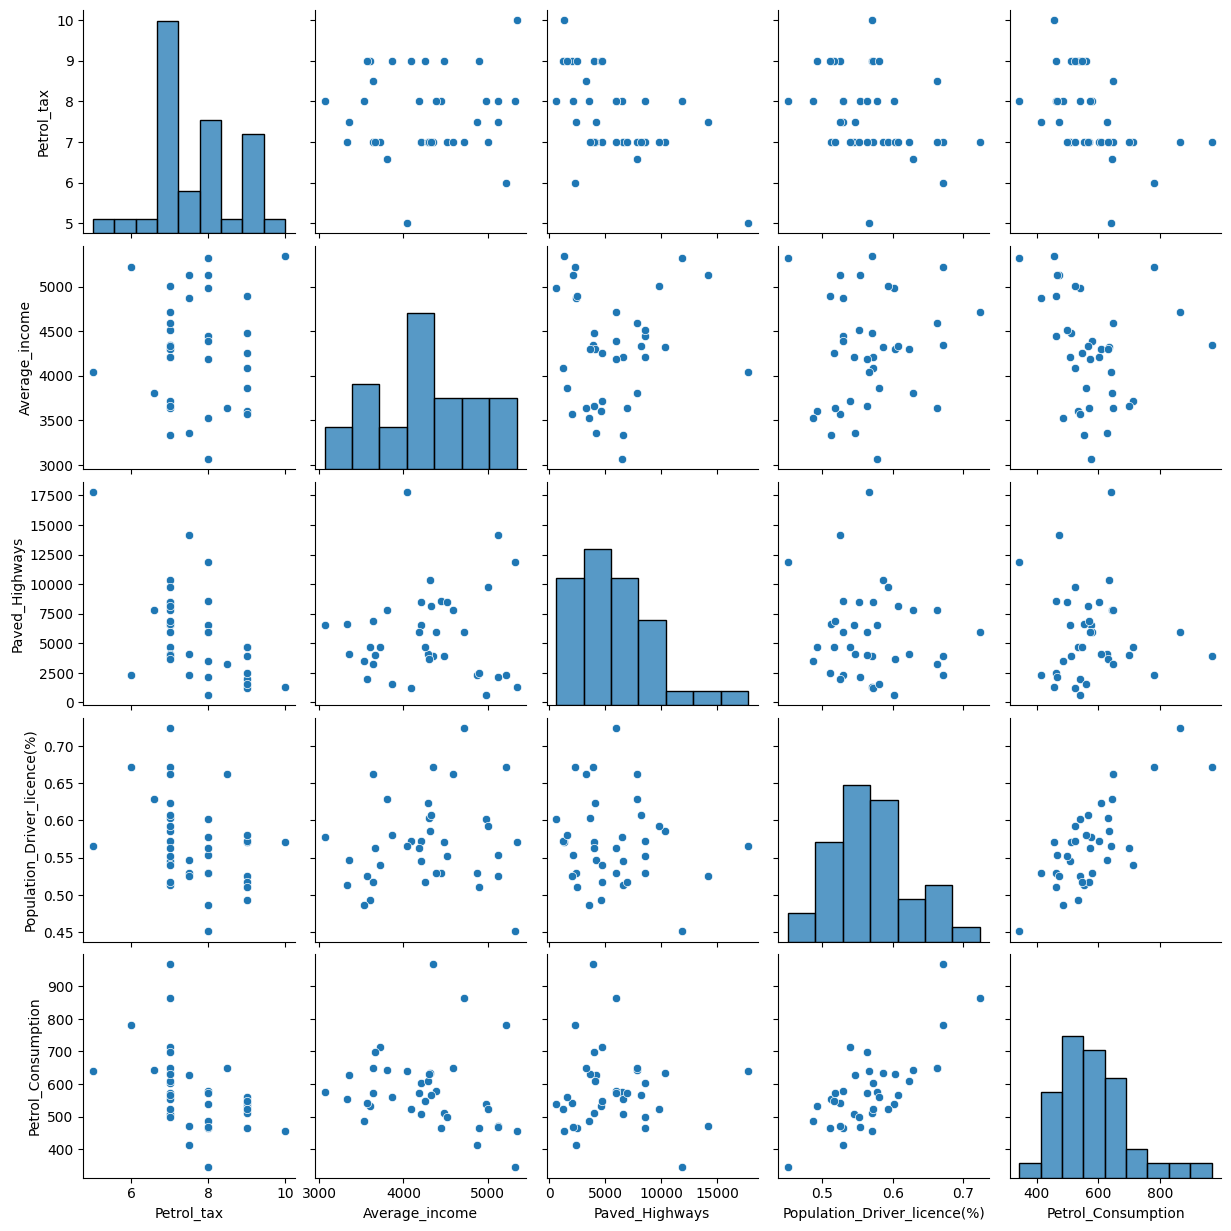

In [28]:
sns.pairplot(data=df_train)
plt.show()

In [6]:
X_train = df_train.drop(['Petrol_Consumption'], axis=1)

y_train = df_train['Petrol_Consumption']

X_test = df_test.drop(['Petrol_Consumption'], axis=1)

y_test = df_test['Petrol_Consumption']

In [38]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [8]:
model = RandomForestRegressor(random_state=2117)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=2117)

In [10]:
y_hat = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"R2: {r2_score(y_test, y_hat)}")

MSE: 8016.494069999998
R2: -0.19490617225800344


In [13]:
# dump(model,open("random_forest_2117.sav", "wb"))

joblib.dump(model, "random_forest_2117.joblib")

['random_forest_2117.joblib']

In [15]:
model_tree = DecisionTreeRegressor(random_state=2029)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2029)

In [17]:
y_hat_tree = model_tree.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_hat_tree)}")
print(f"R2: {r2_score(y_test, y_hat_tree)}")

MSE: 17728.5
R2: -1.642538482520953


In [19]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [20]:
y_hat_linear = model_linear.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_hat_linear)}")
print(f"R2: {r2_score(y_test, y_hat_linear)}")

MSE: 4083.255871745382
R2: 0.3913664001428877


In [39]:
model_linear_scaled = LinearRegression()
model_linear_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [40]:
y_hat_linear_scaled = model_linear_scaled.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(y_test, y_hat_linear_scaled)}")
print(f"R2: {r2_score(y_test, y_hat_linear_scaled)}")

MSE: 4083.255871745399
R2: 0.39136640014288526
